<a href="https://colab.research.google.com/github/mahdiskj/DecisionTree/blob/main/Copy_of_decision_tree_regression_GITHUB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Regression

## Importing the libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [6]:
dataset = pd.read_csv('loan_data.csv')
X = dataset.iloc[:, 2:].values
y = dataset.iloc[:, 0:1].values

In [7]:
print(y)

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


In [8]:
# SimpleImputer is a class of the sklearn.impute module
from sklearn.impute import SimpleImputer
# replacinf missing values (nan or empty values) with the mean of all the data :
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# fit method connects the Imputer object with the matrix of X 
imputer.fit(X)
#trasnform will apply the method 'fit' on X (non number values should be excluded)
X = imputer.transform(X)

In [9]:
from sklearn.model_selection import train_test_split
# random_state = 1 : to have the same result of the split every time the code is executed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [10]:
# StandardScaler : the class for standadization
from sklearn.preprocessing import StandardScaler
# creating the standardization object:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
print(X_train)

[[ 0.61924689  0.52102374  1.44015531 ... -0.30030245 -0.23469394
  -0.43305744]
 [ 1.03957619  1.813874    0.57377758 ... -0.30030245 -0.23469394
  -0.43305744]
 [-1.36336829 -0.01434434  0.49363714 ... -0.30030245 -0.23469394
  -0.43305744]
 ...
 [ 0.13196248  0.40176264 -0.17254084 ... -0.30030245  3.51160806
  -0.43305744]
 [ 1.26275989  1.50371772  0.24702624 ... -0.30030245 -0.23469394
  -0.43305744]
 [-0.85376552 -1.07999835 -1.31278764 ... -0.30030245 -0.23469394
  -0.43305744]]


## Training the Decision Tree Regression model on the whole dataset

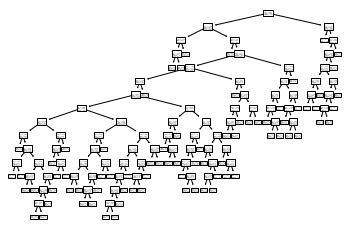

In [12]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
tree.plot_tree(regressor)
plt.show()
# 'plt.show()' : just to avoid printing extra text

In [16]:
y_pred=regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

[[0. 0.]
 [1. 1.]
 [1. 1.]
 ...
 [0. 0.]
 [0. 0.]
 [1. 1.]]


0.945620224962261